In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mnns

                Type: JDA
               Wires: 588
          Electrodes: 4
Inner-wire junctions: None
      Wire junctions: 2576
              Length: 56.00 um (8.000 l0)
               Width: 35.00 um (5.000 l0)
        Wire Density: 0.3000 um^-2 (14.70 l0^-2)


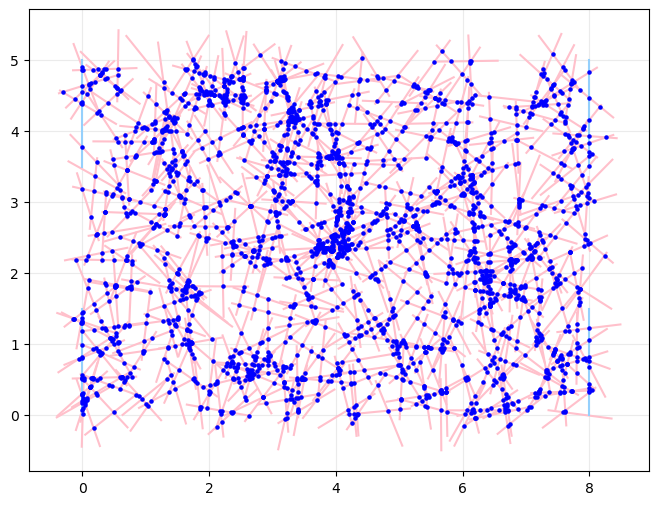

In [8]:
# Create a NWN
NWN = mnns.create_NWN(
    size = (8, 5),
    seed = 5, 
    density = 14.7
)

# Add four electrodes to the NWN
bottom_l, top_l, bottom_r, top_r = mnns.add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]]
)

# Print details of the NWN
print(NWN)

# Plot NWN
fig, ax = mnns.plot_NWN(NWN)
plt.show()

In [9]:
# Set model parameters
model = mnns.models.decay_HP_model
NWN.resistance_function = "linear"
NWN.state_vars = ["x"]
NWN.set_state_var("x", 0.05)
NWN.graph["tau"] = 100

# Set solver parameters
min_time = 0
max_time = 10000
dt = 2.0
tol = 1e-7
t_eval = np.arange(min_time, max_time, dt)

# Define the voltage waveform
def voltage_func(t):
    V0 = 20
    return np.full_like(t, V0)

# Use the Strukov window function
def window_func(x):
    x = np.clip(x, 0, 1)
    return x * (1 - x)

# Evolve NWN to find state variables over time
args = (NWN, bottom_l, top_r, voltage_func, window_func)
sol = NWN.evolve(model, t_eval, args=args, ivp_options={"rtol": tol, "atol": tol})

# Fine current though the drain electrode
I = mnns.get_evolution_current(NWN, sol, bottom_l, top_r, voltage_func)

# Scale the quantities by the right units
scaled_V = voltage_func(sol.t) * NWN.units["v0"]
scaled_I = I * NWN.units["i0"]
scaled_t = sol.t * NWN.units["t0"] * 1e-6

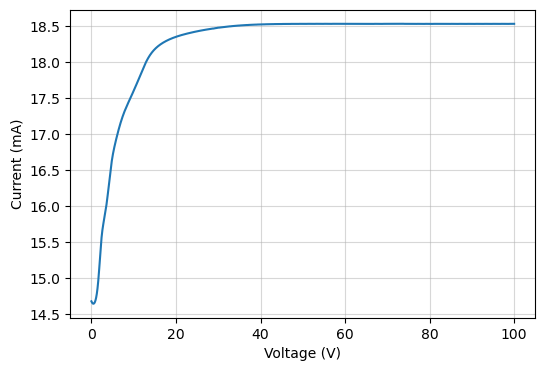

In [10]:
# Plot hysteresis curve
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(scaled_t, scaled_I * 1e3)
ax.grid(alpha=0.5)
ax.set_xlabel("Voltage (V)")
ax.set_ylabel("Current (mA)")
plt.show()